# Classifier Training

In [1]:
# Import all dependencies

import sys  
sys.path.insert(0, "../src")

from classify import *         # Module containing classifier

# Print parameters
pd.set_option('expand_frame_repr', False)
#pd.set_option('display.max_rows', None)

import plotly.io as pio                    # Need this so JupyterLab plotly images show up in GitHub.
pio.renderers.default="plotly_mimetype"    # "   "

In [2]:
# Global variables (for this notebook)

DIR_TRAIN = "../images/traffic_light_images/training"
DIR_TEST  = "../images/traffic_light_images/test"

# Training and testing datasets

df_train, df_train_true_labels = DataLoader(CLASSES).load_dataset(DIR_TRAIN)
df_test, df_test_true_labels = DataLoader(CLASSES).load_dataset(DIR_TEST)

In [3]:
# Training Loops

# Define parameters for each run

# df_runs
#
# Dataframe which holds the parameters for every training run
# & stores the evaluation metrics at the end of every run.
#
# df_runs.loc[i] = input parameters & evaluation metrics for training run i
#                  (indexes start at 0)

df_runs = pd.DataFrame(columns=["img_size", "crop_left", "crop_top", "w1", "w2"])

# Run "0" is our benchmark
df_runs = df_runs.append({"img_size": 32, "crop_left": 10, "crop_top": 1, "w1": 1, "w2": 1, "accuracy": "-", "reds_predicted_green": "-"}, ignore_index=True)

# Runs similar to benchmark, with different weights
df_runs = df_runs.append({"img_size": 32, "crop_left": 10, "crop_top": 1, "w1": 1, "w2": 0, "accuracy": "-", "reds_predicted_green": "-"}, ignore_index=True)
df_runs = df_runs.append({"img_size": 32, "crop_left": 10, "crop_top": 1, "w1": 0, "w2": 1, "accuracy": "-", "reds_predicted_green": "-"}, ignore_index=True)
df_runs = df_runs.append({"img_size": 32, "crop_left": 10, "crop_top": 1, "w1": 1, "w2": 1, "accuracy": "-", "reds_predicted_green": "-"}, ignore_index=True)
df_runs = df_runs.append({"img_size": 32, "crop_left": 10, "crop_top": 1, "w1": 2, "w2": 1, "accuracy": "-", "reds_predicted_green": "-"}, ignore_index=True)
df_runs = df_runs.append({"img_size": 32, "crop_left": 10, "crop_top": 1, "w1": 1, "w2": 2, "accuracy": "-", "reds_predicted_green": "-"}, ignore_index=True)

# Greater cropped area
df_runs = df_runs.append({"img_size": 32, "crop_left": 12, "crop_top": 2, "w1": 1, "w2": 0, "accuracy": "-", "reds_predicted_green": "-"}, ignore_index=True)
df_runs = df_runs.append({"img_size": 32, "crop_left": 12, "crop_top": 2, "w1": 0, "w2": 1, "accuracy": "-", "reds_predicted_green": "-"}, ignore_index=True)
df_runs = df_runs.append({"img_size": 32, "crop_left": 12, "crop_top": 2, "w1": 1, "w2": 1, "accuracy": "-", "reds_predicted_green": "-"}, ignore_index=True)
df_runs = df_runs.append({"img_size": 32, "crop_left": 12, "crop_top": 2, "w1": 2, "w2": 1, "accuracy": "-", "reds_predicted_green": "-"}, ignore_index=True)
df_runs = df_runs.append({"img_size": 32, "crop_left": 12, "crop_top": 2, "w1": 1, "w2": 2, "accuracy": "-", "reds_predicted_green": "-"}, ignore_index=True)

# Run training loops

n_runs = len(df_runs)

for i in range(n_runs):

    # Parameters for this run    
    
    s_params = df_runs.loc[i]
    
    img_size = s_params["img_size"]
    crop_left = s_params["crop_left"]
    crop_top = s_params["crop_top"]
    w1 = s_params["w1"]
    w2 = s_params["w2"]
    
    # Make predictions on training dataset
    
    df_train_predictions = Classifier(img_size, crop_left, crop_top, w1, w2).run(df_train)
    
    # Derive evaluation metrics

    metrics = Evaluator().run(df_train_true_labels["label"], df_train_predictions["y_bar"])
    
    df_runs["accuracy"][i] = np.round(metrics["accuracy"],3)
    df_runs["reds_predicted_green"][i] = len(metrics["reds_predicted_green"])
    
print(df_runs.to_markdown())    


|    |   img_size |   crop_left |   crop_top |   w1 |   w2 |   accuracy |   reds_predicted_green |
|---:|-----------:|------------:|-----------:|-----:|-----:|-----------:|-----------------------:|
|  0 |         32 |          10 |          1 |    1 |    1 |      0.864 |                      0 |
|  1 |         32 |          10 |          1 |    1 |    0 |      0.955 |                      1 |
|  2 |         32 |          10 |          1 |    0 |    1 |      0.848 |                      0 |
|  3 |         32 |          10 |          1 |    1 |    1 |      0.864 |                      0 |
|  4 |         32 |          10 |          1 |    2 |    1 |      0.877 |                      0 |
|  5 |         32 |          10 |          1 |    1 |    2 |      0.858 |                      0 |
|  6 |         32 |          12 |          2 |    1 |    0 |      0.984 |                      5 |
|  7 |         32 |          12 |          2 |    0 |    1 |      0.865 |                      0 |
|  8 |    

# Selected parameters

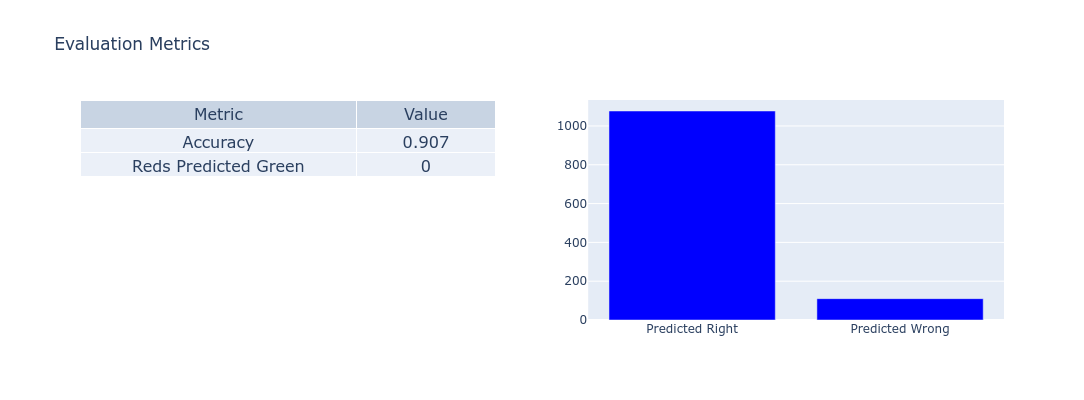

WRONG PREDICTIONS

     true_labels predicted_labels
0      [0, 0, 1]        [1, 0, 0]
9      [0, 0, 1]        [1, 0, 0]
11     [0, 0, 1]        [1, 0, 0]
15     [0, 0, 1]        [1, 0, 0]
16     [0, 0, 1]        [1, 0, 0]
...          ...              ...
1180   [0, 1, 0]        [1, 0, 0]
1182   [0, 1, 0]        [1, 0, 0]
1183   [0, 1, 0]        [1, 0, 0]
1184   [0, 1, 0]        [1, 0, 0]
1185   [0, 1, 0]        [1, 0, 0]

[110 rows x 2 columns]

RED LIGHTS CLASSIFIED AS GREEN

Empty DataFrame
Columns: [true_labels, predicted_labels]
Index: []


In [4]:
img_size = 32
crop_left = 12
crop_top = 2
w1 = 2
w2 = 1

df_train_predictions = Classifier(img_size, crop_left, crop_top, w1, w2).run(df_train)
metrics = Evaluator().run(df_train_true_labels["label"], df_train_predictions["y_bar"])

print_metrics(metrics)

# Classifier Testing

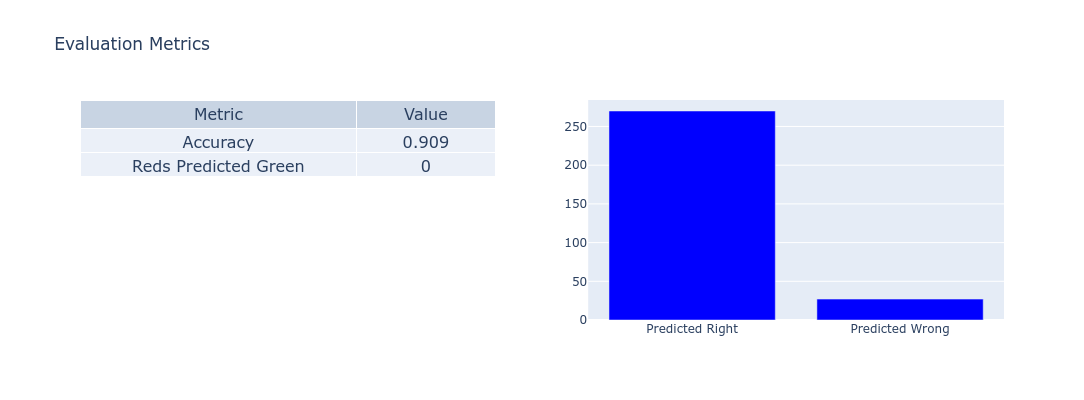

WRONG PREDICTIONS

    true_labels predicted_labels
0     [0, 0, 1]        [1, 0, 0]
13    [0, 0, 1]        [1, 0, 0]
20    [0, 0, 1]        [1, 0, 0]
21    [0, 0, 1]        [1, 0, 0]
37    [0, 0, 1]        [1, 0, 0]
38    [0, 0, 1]        [1, 0, 0]
40    [0, 0, 1]        [1, 0, 0]
41    [0, 0, 1]        [1, 0, 0]
42    [0, 0, 1]        [1, 0, 0]
48    [0, 0, 1]        [1, 0, 0]
50    [0, 0, 1]        [1, 0, 0]
56    [0, 0, 1]        [1, 0, 0]
59    [0, 0, 1]        [1, 0, 0]
60    [0, 0, 1]        [1, 0, 0]
65    [0, 0, 1]        [1, 0, 0]
66    [0, 0, 1]        [1, 0, 0]
68    [0, 0, 1]        [1, 0, 0]
75    [0, 0, 1]        [1, 0, 0]
79    [0, 0, 1]        [1, 0, 0]
86    [0, 0, 1]        [1, 0, 0]
96    [0, 0, 1]        [1, 0, 0]
98    [0, 0, 1]        [1, 0, 0]
99    [0, 0, 1]        [1, 0, 0]
106   [0, 0, 1]        [1, 0, 0]
288   [0, 1, 0]        [1, 0, 0]
290   [0, 1, 0]        [1, 0, 0]
292   [0, 1, 0]        [1, 0, 0]

RED LIGHTS CLASSIFIED AS GREEN

Empty DataFrame
Columns:

In [5]:
df_test_predictions = Classifier(img_size, crop_left, crop_top, w1, w2).run(df_test)

metrics = Evaluator().run(df_test_true_labels["label"], df_test_predictions["y_bar"])

print_metrics(metrics)